In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
df = pd.read_csv("/Users/jomachase/Documents/Ironhack/Labs/Week5/Day1/amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [ ]:
Part 1: Understanding Product Categories

In [9]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [10]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [11]:
df.shape

(2443651, 9)

In [13]:
frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

The top 5 items: 
1. Sports & Outdoors
2. Beauty
3. Handmade Clothing, Shoes & Accessories 
4. Bath & Body
5. Birthday Gifts

**Visualizations**:

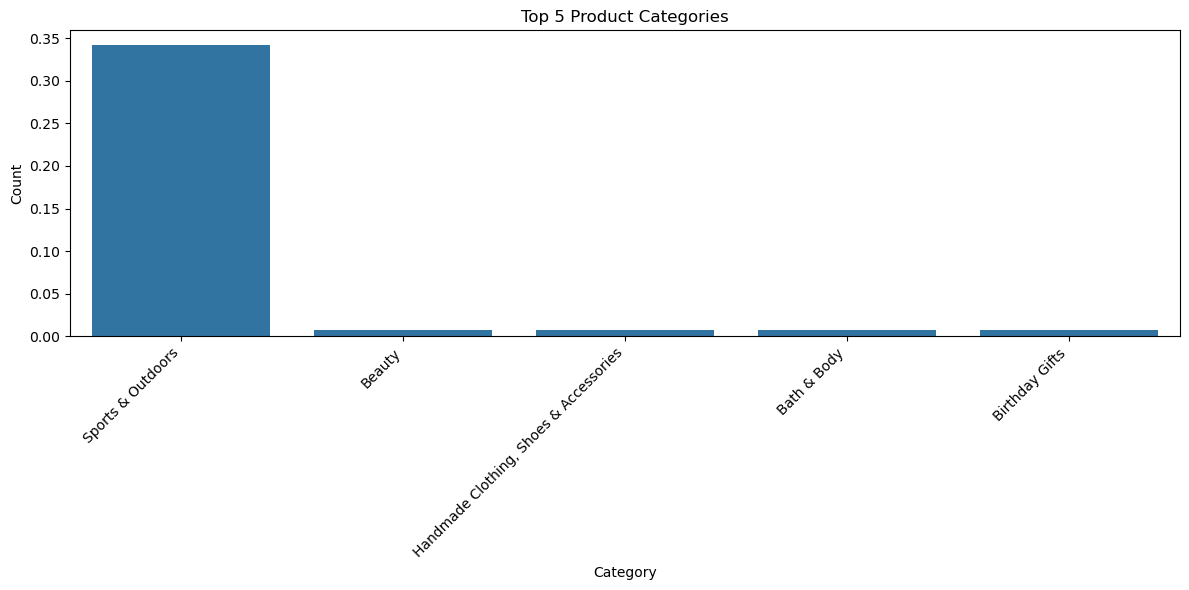

In [27]:
# Using the top 5 categories from the frequency table
top_5_categories = frequency_table.head(5)

# The bar plot without palette to avoid the warning
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_categories.index, y=top_5_categories.values)
plt.title('Top 5 Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Part 2: Delving into Product Pricing

**Measures of Centrality**:

In [7]:
mean_price = df['price'].mean()
print(f"{mean_price:.2f}")

89.24


In [8]:
median_price = df['price'].median()
print(f"{median_price:.2f}")

19.09


In [9]:
mode_price = df['price'].mode()[0]
print(f"{mode_price:.2f}")

9.99


The average price of products listed is $89.24. This represents the arithmetic mean of all product prices in Amazon.
The most common price point (mode) is $9.99, which is significantly lower than the average price. This creates an interesting comparison that reveals insights about the price distribution:

 **Measures of Dispersion**:

In [23]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])


print(f"The variance is: {variance_price:.2f}")
print(f"The standard dev. is: {std_dev_price:.2f}")
print(f"The range is: {range_price: .2f}")
print(f"The 25th percentile is: {quantiles_price[0.25]:.2f}")
print(f"The 50th percentile is: {quantiles_price[0.5]:.2f}")
print(f"The 75th percentile is: {quantiles_price[0.75]:.2f}")

The variance is: 119445.49
The standard dev. is: 345.61
The range is:  100000.00
The 25th percentile is: 9.99
The 50th percentile is: 19.09
The 75th percentile is: 45.99


Based on calculated statistics and data analysis, the products prices show extremely high variation.

**Visualizations**:

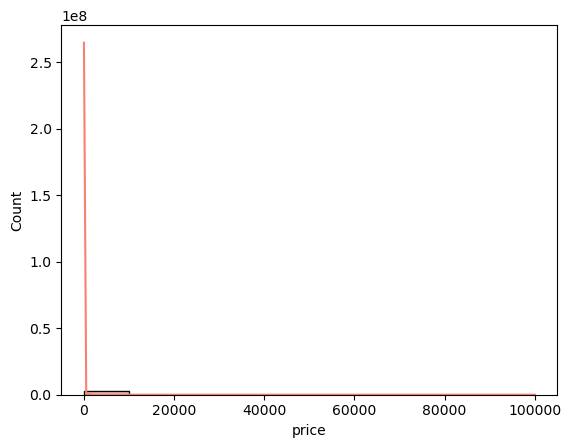

In [28]:
# Histogram to visualize price distribution
sns.histplot(df['price'], kde=True, bins=10, color="salmon")
plt.show()


Based on the histogram, most products fall in the $0-$20 range, with a heavy concentration around the $9.99. The massive spike at the left of your histogram confirms this. The bar to the left represents the majority of products
Mode of $9.99 indicates the most common price point

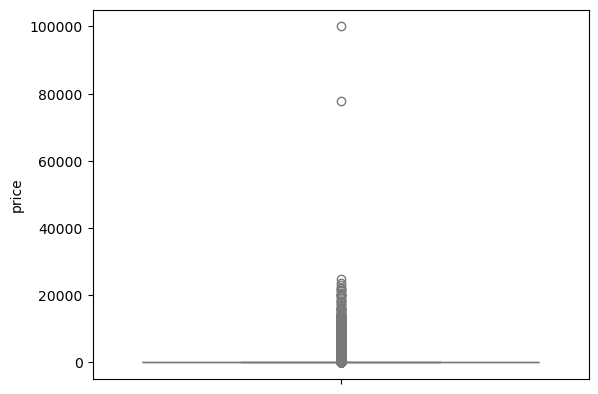

In [29]:
# Plotting a boxplot for the 'price' column with a light blue color
sns.boxplot(data = df['price'], color="lightblue")
plt.show()

Yes, there are definitely products priced higher than the rest. The histogram ranging to $100,000 proves this. Any product above the upper whisker (Q3) is an outlier. Products above Q3 are extreme outliers. Products at $100,000+ when most are around $10 shows extreme outliers

Part 3: Unpacking Product Ratings

In [30]:
#counts of ratings
df.stars.value_counts()

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

In [33]:
# Get the top 5 most frequent ratings
top_5_ratings = df.stars.value_counts().head(5)
print(top_5_ratings)

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
Name: count, dtype: int64


There are signs of extreme Polarization with reviews: 97.4% of ratings are either 0 stars or high satisfaction (4.4+ stars)
Ratings are zero stars, suggesting significant issues.

High-Rating: When satisfied, customers give very high ratings (4.4, 4.5, 4.6) rather than round numbers

Missing Middle Ground: The absence of moderate ratings (1-3 stars) suggests UK customers operate on a binary satisfaction model

Cultural Directness: UK customers appear to use reviews as both complaint mechanisms and strong recommendation tools

This pattern suggests that success on Amazon UK requires exceptional attention to quality control and customer service, as there's very little middle ground between complete customer satisfaction and total disappointment.

In [ ]:
**Measures of Centrality**:

mean_rating = df['stars'].mean()
print(f"{mean_rating :.2f}")

In [36]:
median_rating = df['stars'].median()
print(f"{median_rating:.2f}")

0.00


In [35]:
mode_rating = df['stars'].mode()[0]
print(f"{mode_rating:.2f}")

0.00


**Measures of Dispersion**:

In [37]:
variance_price = df['stars'].var()
std_dev_price = df['stars'].std()
min_price = df['stars'].min()
max_price = df['stars'].max()
range_price = max_price - min_price
quantiles_price = df['stars'].quantile([0.25, 0.5, 0.75])


print(f"The variance is: {variance_price:.2f}")
print(f"The standard dev. is: {std_dev_price:.2f}")
print(f"The range is: {range_price: .2f}")
print(f"The 25th percentile is: {quantiles_price[0.25]:.2f}")
print(f"The 50th percentile is: {quantiles_price[0.5]:.2f}")
print(f"The 75th percentile is: {quantiles_price[0.75]:.2f}")

The variance is: 4.82
The standard dev. is: 2.19
The range is:  5.00
The 25th percentile is: 0.00
The 50th percentile is: 0.00
The 75th percentile is: 4.40


The ratings data shows maximum inconsistency. There is no common trend:

Standard Deviation of 2.19 - Extremely high for a 0-5 scale
Variance of 4.82 - Indicates massive spread in customer opinions
Polarized Distribution - 50% at 0 stars, 25% jump to 4.4+ stars
Missing Middle Ground - Very few moderate ratings
This level of inconsistency suggests:

Product Quality Issues: Wide variation in product quality or delivery experience .  Products either exceed or severely disappoint. UK customers tend to rate in extremes rather than moderately. May include fake reviews, return disputes, or delivery problems


*Shape of the Distribution**:

In [38]:
skewness_price = df['stars'].skew()
kurtosis_price = df['stars'].kurtosis()

print(skewness_price)
print(kurtosis_price)

0.08120735761080881
-1.9260061280432994


NO - the ratings are not normally distributed. The kurtosis value of -1.93 indicates a distribution flatter than normal with lighter tails, which significantly deviates from the normal distribution's kurtosis of 0.

**Visualizations**:

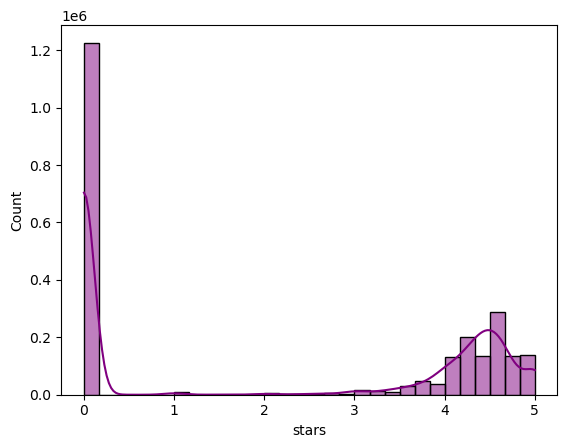

In [39]:
# Plotting a histogram for the 'stars' column 
sns.histplot(df['stars'], kde=True, bins=30, color="purple")
plt.show()

YES - 0.0 stars is by far the most common rating, dominating your distribution with an overwhelming frequency that dwarfs all other ratings combined. The secondary cluster of high ratings shows that when products work correctly, customers are quite satisfied

